# Everyday Carry Cost/Benefit Analysis
Here we will conduct a data cleaning and analysis of the utility score and mass of every item in my backpack.

In [1]:
import pandas as pd

In [2]:
from pandas import ExcelFile

In [3]:
df = pd.read_excel('backpack.xlsx')

In [4]:
df.head()

,Item,Utility Points,Mass (g),Mass per Utility Point
0,NaN,NaN,6908,NaN
1,Graph-pad,8.0,380,47.500000
2,sharpie,10.0,9,0.900000
3,altoids,4.0,55,13.750000
4,moisturizing-cream,7.0,123,17.571429


In [5]:
#let's drop the first row, which was used for totaling mass
df.drop(df.index[0], inplace=True)

In [6]:
#we'll also drop the Mass per Utility Point column, as the python analysis will
#be more advanced than the spreadsheet analysis, and a clean slate is best
df.drop('Mass per Utility Point', axis=1, inplace=True)

In [7]:
#let's also rename the columns, as the current names aren't programmer-friendly
df.rename(columns={'Item':'item', 'Utility Points':'utility', 'Mass (g)':'mass'}, inplace=True)

In [8]:
df.head()

,item,utility,mass
1,Graph-pad,8.0,380
2,sharpie,10.0,9
3,altoids,4.0,55
4,moisturizing-cream,7.0,123
5,wallet,7.0,133


In [9]:
#import pyplot
import matplotlib.pyplot as plt

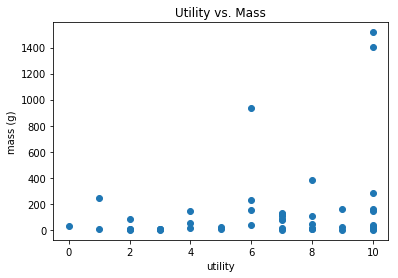

In [10]:
#create a scatter plot of utility and mass
plt.scatter(df['utility'], df['mass'])
plt.xlabel('utility')
plt.ylabel('mass (g)')
plt.title('Utility vs. Mass')
plt.show()

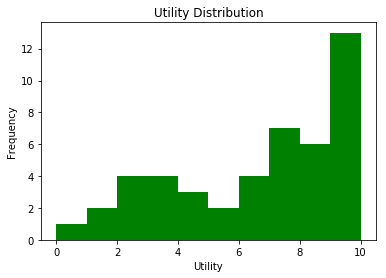

In [39]:
#Plot histogram of utilities
plt.hist(df['utility'], color='green')
plt.title('Utility Distribution')
plt.xlabel('Utility')
plt.ylabel('Frequency')
plt.show()

Good news! The mode of the distribution of EDC utility is on the positive side.

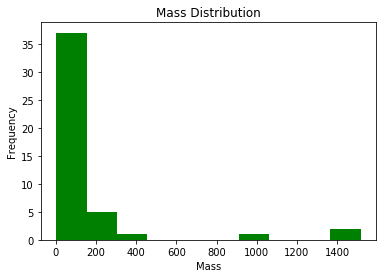

In [41]:
#Plot histogram of masses
plt.hist(df['mass'], color='green')
plt.title('Mass Distribution')
plt.xlabel('Mass')
plt.ylabel('Frequency')
plt.show()

The mass distribution seems to have a mode near the left side of the graph, but a few outliers are making it difficult to interpret our data. Let's find out what they are.

In [49]:
#Get items above 800g of mass
df[df['mass']>800]

,item,utility,mass
37,Book-2,6.0,933
43,backpack,10.0,1402
45,laptop,10.0,1517


In [59]:
import numpy as np

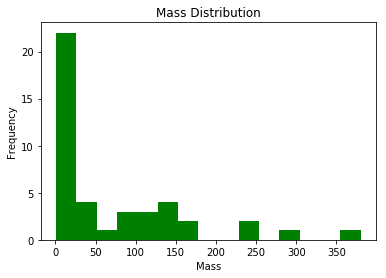

In [65]:
#Regenerate mass histogram excluding these items
plt.hist(np.array(df.loc[df['mass']<800,['mass']]), bins=15, color='green')
plt.title('Mass Distribution')
plt.xlabel('Mass')
plt.ylabel('Frequency')
plt.show()

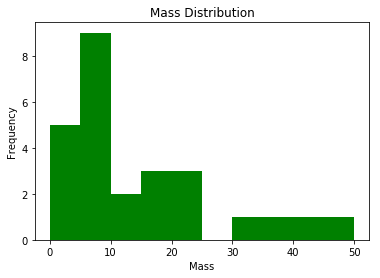

In [71]:
#Zoom in even more on the 0-50 interval using the 'range' parameter
plt.hist(df['mass'], color='green',range=(0,50))
plt.title('Mass Distribution')
plt.xlabel('Mass')
plt.ylabel('Frequency')
plt.show()

In [72]:
#Find mean
np.mean(df['mass'])

150.17391304347825

In [73]:
#Find median
np.median(df['mass'])

35.0

The distribution of masses is ultra-positively skewed, but that will not affect the outcome of the next excercise.

The real point of this analysis is to discover which items are worth carrying around in my backpack. Instead of building a model, I am going to recreate the scatter plot with four quadrants:
* low utility & low mass
* high utility & low mass
* low utility & high mass (problematic)
* high utility & high mass

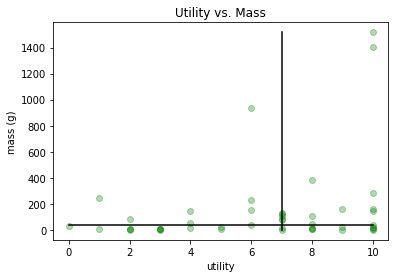

In [88]:
#create a scatter plot of utility and mass with quadrants denoted by data medians
plt.scatter(df['utility'], df['mass'], alpha=0.3, color='green')

ut_min = np.min(df['utility'])
ut_med = np.median(df['utility'])
ut_max = np.max(df['utility'])

ma_min = np.min(df['mass'])
ma_med = np.median(df['mass'])
ma_max = np.max(df['mass'])

plt.plot((ut_med, ut_med), (ma_min, ma_max), 'k-')

plt.plot((ut_min, ut_max), (ma_med, ma_med), 'k-')

plt.xlabel('utility')
plt.ylabel('mass (g)')
plt.title('Utility vs. Mass')
plt.show()

Now that we have a scatter plot with our median quadrants, we will fetch a list of items in the problematic northwestern quadrant.

In [93]:
df[(df['utility']<ut_med) & (df['mass']>ma_med)]

,item,utility,mass
3,altoids,4.0,55
15,ti-36x-calculator,4.0,148
17,deodorant,2.0,85
20,Leatherman-case:leatherman-multitool,6.0,151
24,Usb-charger,6.0,41
28,Mason-jar,1.0,243
36,Book-1,6.0,229
37,Book-2,6.0,933


There we go! I now have a list of items that I should consider tossing from my backpack or upgrading to lighter alternatives.